In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.keras.utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import auth
from google.colab import drive

auth.authenticate_user()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
path = '/content/gdrive/MyDrive/Colab Notebooks/DACON_CV_award/data/'

In [7]:
train_data = pd.read_csv(path+'train.csv')
test_data  = pd.read_csv(path+'test.csv')
sub_data   = pd.read_csv(path+'submission.csv')

In [8]:
def x_data(data):
    cols = [ col for col in data.columns if col in ['id', 'digit', 'letter']]
    x = data.drop(cols, axis=1).values
    x = x.reshape(-1, 28, 28, 1)
    x = x/255
    return x

def one_hot_encoding(data):
    y = data['digit']
    y_train = np.zeros((len(y), len(y.unique())))
    for i, digit in enumerate(y):
        y_train[i, digit] = 1
    return y_train

In [9]:
x_train = x_data(train_data)
x_test  = x_data(test_data)
y_train = one_hot_encoding(train_data)

In [10]:
model = Sequential()
model.add( Conv2D( 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1) ) )
model.add( BatchNormalization() )
model.add( Dropout(0.2) )

model.add( Conv2D( 128, kernel_size=(3,3), activation='relu') )
model.add( Dropout(0.2) )

model.add( Conv2D( 128, kernel_size=(3,3), activation='relu') )
model.add( Conv2D( 64, kernel_size=(3,3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2,2)) )
model.add( Flatten() )

model.add( Dense( 32, activation='relu') )
model.add( Dense( 10, activation='softmax') )

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        7

In [12]:
model.compile( loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])

early_stopping = EarlyStopping(patience=20)
hist = model.fit( x_train, y_train, epochs=100, batch_size=40)


Epoch 1/100
52/52 [==============================] - 32s 12ms/step - loss: 2.1727 - accuracy: 0.1948
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 1.4778 - accuracy: 0.5024
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 1.0546 - accuracy: 0.6621
Epoch 4/100
52/52 [==============================] - 0s 9ms/step - loss: 0.8404 - accuracy: 0.7256
Epoch 5/100
52/52 [==============================] - 0s 9ms/step - loss: 0.6393 - accuracy: 0.7939
Epoch 6/100
52/52 [==============================] - 0s 9ms/step - loss: 0.5011 - accuracy: 0.8345
Epoch 7/100
52/52 [==============================] - 0s 9ms/step - loss: 0.4144 - accuracy: 0.8643
Epoch 8/100
52/52 [==============================] - 0s 9ms/step - loss: 0.3355 - accuracy: 0.8833
Epoch 9/100
52/52 [==============================] - 0s 9ms/step - loss: 0.2694 - accuracy: 0.9053
Epoch 10/100
52/52 [==============================] - 0s 9ms/step - loss: 0.1988 - accuracy: 0.9326
Epoch 1

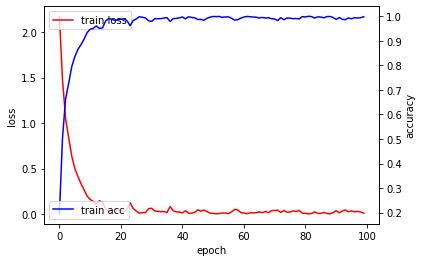

In [13]:
fig, lss = plt.subplots()
acc = lss.twinx()

lss.plot(hist.history['loss'],    'r', label='train loss')
acc.plot(hist.history['accuracy'],'b', label='train acc')

lss.set_xlabel('epoch')
lss.set_ylabel('loss')
acc.set_ylabel('accuracy')

lss.legend(loc='upper left')
acc.legend(loc='lower left')

plt.show()

In [14]:
sub_data['digit'] = np.argmax(model.predict(x_test), axis=1)
sub_data.to_csv(path+'baseline.csv', index=False)